In [1]:
import os
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import cv2

Data Load

In [2]:
data_dir = '/NasData/home/knh/project/data'
butterfly_dir = os.path.join(data_dir, 'butterfly')
butterfly_train_dir = os.path.join(butterfly_dir, 'train')
butterfly_test_dir = os.path.join(butterfly_dir, 'test')
print(os.listdir(butterfly_dir))

['Testing_set.csv', 'train', 'test', 'Training_set.csv']


In [3]:
butterfly_train_csv = os.path.join(butterfly_dir, 'Training_set.csv')
butterfly_test_csv = os.path.join(butterfly_dir, 'Testing_set.csv')

In [4]:
print(butterfly_train_csv)

/NasData/home/knh/project/data/butterfly/Training_set.csv


In [5]:
print(butterfly_test_csv)

/NasData/home/knh/project/data/butterfly/Testing_set.csv


>  - Load the data from the csv file

In [6]:
butterfly_train_df = pd.read_csv(butterfly_train_csv)

In [7]:
butterfly_test_df = pd.read_csv(butterfly_test_csv)

Data Analysis

In [8]:
butterfly_train_df

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT


* label 확인해보자

In [9]:
butterfly_train_df.count()

filename    6499
label       6499
dtype: int64

In [10]:
butterfly_train_df['label'].unique()
# label columns에 어떤 종류의 데이터가 있는지?

array(['SOUTHERN DOGFACE', 'ADONIS', 'BROWN SIPROETA', 'MONARCH',
       'GREEN CELLED CATTLEHEART', 'CAIRNS BIRDWING',
       'EASTERN DAPPLE WHITE', 'RED POSTMAN', 'MANGROVE SKIPPER',
       'BLACK HAIRSTREAK', 'CABBAGE WHITE', 'RED ADMIRAL', 'PAINTED LADY',
       'PAPER KITE', 'SOOTYWING', 'PINE WHITE', 'PEACOCK',
       'CHECQUERED SKIPPER', 'JULIA', 'COMMON WOOD-NYMPH', 'BLUE MORPHO',
       'CLOUDED SULPHUR', 'STRAITED QUEEN', 'ORANGE OAKLEAF',
       'PURPLISH COPPER', 'ATALA', 'IPHICLUS SISTER', 'DANAID EGGFLY',
       'LARGE MARBLE', 'PIPEVINE SWALLOW', 'BLUE SPOTTED CROW',
       'RED CRACKER', 'QUESTION MARK', 'CRIMSON PATCH', 'BANDED PEACOCK',
       'SCARCE SWALLOW', 'COPPER TAIL', 'GREAT JAY', 'INDRA SWALLOW',
       'VICEROY', 'MALACHITE', 'APPOLLO', 'TWO BARRED FLASHER',
       'MOURNING CLOAK', 'TROPICAL LEAFWING', 'POPINJAY', 'ORANGE TIP',
       'GOLD BANDED', 'BECKERS WHITE', 'RED SPOTTED PURPLE',
       'MILBERTS TORTOISESHELL', 'SILVER SPOT SKIPPER', 'AMERICAN SN

In [11]:
label_array = butterfly_train_df['label'].unique()
label_array

array(['SOUTHERN DOGFACE', 'ADONIS', 'BROWN SIPROETA', 'MONARCH',
       'GREEN CELLED CATTLEHEART', 'CAIRNS BIRDWING',
       'EASTERN DAPPLE WHITE', 'RED POSTMAN', 'MANGROVE SKIPPER',
       'BLACK HAIRSTREAK', 'CABBAGE WHITE', 'RED ADMIRAL', 'PAINTED LADY',
       'PAPER KITE', 'SOOTYWING', 'PINE WHITE', 'PEACOCK',
       'CHECQUERED SKIPPER', 'JULIA', 'COMMON WOOD-NYMPH', 'BLUE MORPHO',
       'CLOUDED SULPHUR', 'STRAITED QUEEN', 'ORANGE OAKLEAF',
       'PURPLISH COPPER', 'ATALA', 'IPHICLUS SISTER', 'DANAID EGGFLY',
       'LARGE MARBLE', 'PIPEVINE SWALLOW', 'BLUE SPOTTED CROW',
       'RED CRACKER', 'QUESTION MARK', 'CRIMSON PATCH', 'BANDED PEACOCK',
       'SCARCE SWALLOW', 'COPPER TAIL', 'GREAT JAY', 'INDRA SWALLOW',
       'VICEROY', 'MALACHITE', 'APPOLLO', 'TWO BARRED FLASHER',
       'MOURNING CLOAK', 'TROPICAL LEAFWING', 'POPINJAY', 'ORANGE TIP',
       'GOLD BANDED', 'BECKERS WHITE', 'RED SPOTTED PURPLE',
       'MILBERTS TORTOISESHELL', 'SILVER SPOT SKIPPER', 'AMERICAN SN

In [12]:
butterfly_train_df['label'].value_counts()

# 각 종류별로 몇 개의 데이터가 있는지?

label
MOURNING CLOAK    131
SLEEPY ORANGE     107
ATALA             100
BROWN SIPROETA     99
CRECENT            97
                 ... 
AMERICAN SNOOT     74
GOLD BANDED        73
MALACHITE          73
CRIMSON PATCH      72
WOOD SATYR         71
Name: count, Length: 75, dtype: int64

In [13]:
butterfly_test_df

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
...,...
2781,Image_2782.jpg
2782,Image_2783.jpg
2783,Image_2784.jpg
2784,Image_2785.jpg


In [14]:
butterfly_test_df.count()

filename    2786
dtype: int64

In [15]:
# 데이터 시각화 한 것 넣기 (sort로 3덩어리씩 묶어서 plot)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'MOURNING CLOAK'),
  Text(1, 0, 'SLEEPY ORANGE'),
  Text(2, 0, 'ATALA'),
  Text(3, 0, 'BROWN SIPROETA'),
  Text(4, 0, 'CRECENT'),
  Text(5, 0, 'SCARCE SWALLOW'),
  Text(6, 0, 'BANDED ORANGE HELICONIAN'),
  Text(7, 0, 'MILBERTS TORTOISESHELL'),
  Text(8, 0, 'RED CRACKER'),
  Text(9, 0, 'ORANGE TIP'),
  Text(10, 0, 'IPHICLUS SISTER'),
  Text(11, 0, 'EASTERN PINE ELFIN'),
  Text(12, 0, 'CHECQUERED SKIPPER'),
  Text(13, 0, 'COPPER TAIL'),
  Text(14, 0, 'DANAID EGGFLY'),
  Text(15, 0, 'GREAT JAY'),
  Text(16, 0, 'EASTERN COMA'),
  Text(17, 0, 'CLEOPATRA'),
  Text(18, 0, 'CLOUDED SULPHUR'),
  Text(19, 0, 'PURPLISH COPPER')])

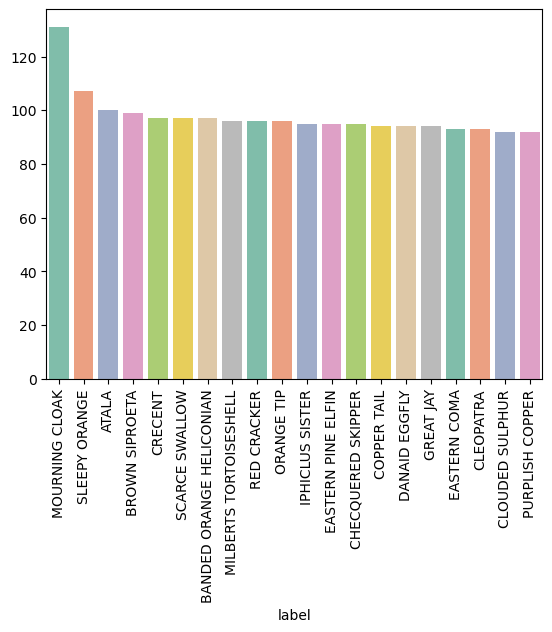

In [16]:
import seaborn as sns

data_dist = butterfly_train_df['label'].value_counts()
sns.barplot(x=data_dist.index[:20], y=data_dist.values[:20], alpha=0.9, palette='Set2')

plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'EASTERN DAPPLE WHITE'),
  Text(1, 0, 'SOOTYWING'),
  Text(2, 0, 'COMMON WOOD-NYMPH'),
  Text(3, 0, 'PAPER KITE'),
  Text(4, 0, 'APPOLLO'),
  Text(5, 0, 'MONARCH'),
  Text(6, 0, 'CABBAGE WHITE'),
  Text(7, 0, 'RED POSTMAN'),
  Text(8, 0, 'GREEN CELLED CATTLEHEART'),
  Text(9, 0, 'ADONIS'),
  Text(10, 0, 'COMMON BANDED AWL'),
  Text(11, 0, 'SOUTHERN DOGFACE'),
  Text(12, 0, 'CLODIUS PARNASSIAN'),
  Text(13, 0, 'MANGROVE SKIPPER'),
  Text(14, 0, 'ORANGE OAKLEAF'),
  Text(15, 0, 'STRAITED QUEEN'),
  Text(16, 0, 'BLUE SPOTTED CROW'),
  Text(17, 0, 'GREY HAIRSTREAK'),
  Text(18, 0, 'MESTRA'),
  Text(19, 0, 'PINE WHITE')])

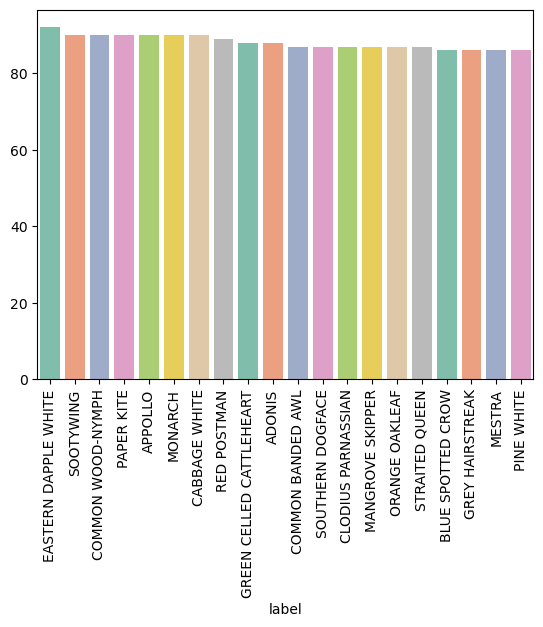

In [17]:
import seaborn as sns

data_dist = butterfly_train_df['label'].value_counts()
sns.barplot(x=data_dist.index[20:40], y=data_dist.values[20:40], alpha=0.9, palette='Set2')

plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'RED SPOTTED PURPLE'),
  Text(1, 0, 'POPINJAY'),
  Text(2, 0, 'CHESTNUT'),
  Text(3, 0, 'BLACK HAIRSTREAK'),
  Text(4, 0, 'AN 88'),
  Text(5, 0, 'ULYSES'),
  Text(6, 0, 'PIPEVINE SWALLOW'),
  Text(7, 0, 'PEACOCK'),
  Text(8, 0, 'TROPICAL LEAFWING'),
  Text(9, 0, 'BANDED PEACOCK'),
  Text(10, 0, 'CAIRNS BIRDWING'),
  Text(11, 0, 'SILVER SPOT SKIPPER'),
  Text(12, 0, 'RED ADMIRAL'),
  Text(13, 0, 'ELBOWED PIERROT'),
  Text(14, 0, 'VICEROY'),
  Text(15, 0, 'BECKERS WHITE'),
  Text(16, 0, 'LARGE MARBLE'),
  Text(17, 0, 'INDRA SWALLOW'),
  Text(18, 0, 'JULIA'),
  Text(19, 0, 'PURPLE HAIRSTREAK')])

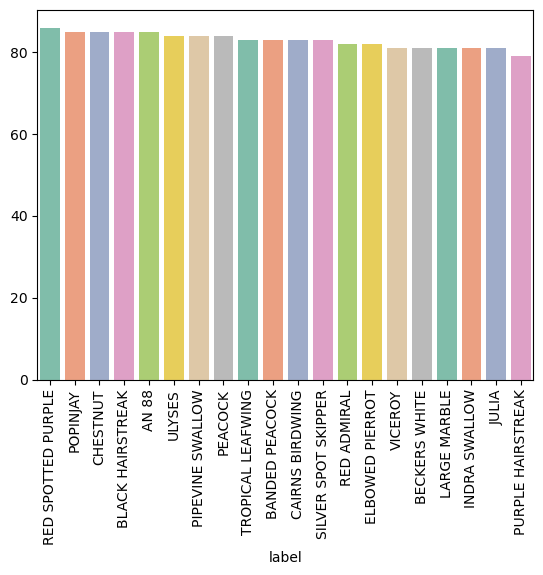

In [18]:
import seaborn as sns

data_dist = butterfly_train_df['label'].value_counts()
sns.barplot(x=data_dist.index[40:60], y=data_dist.values[40:60], alpha=0.9, palette='Set2')

plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'PAINTED LADY'),
  Text(1, 0, 'GREAT EGGFLY'),
  Text(2, 0, 'QUESTION MARK'),
  Text(3, 0, 'TWO BARRED FLASHER'),
  Text(4, 0, 'ZEBRA LONG WING'),
  Text(5, 0, 'ORCHARD SWALLOW'),
  Text(6, 0, 'METALMARK'),
  Text(7, 0, 'YELLOW SWALLOW TAIL'),
  Text(8, 0, 'BLUE MORPHO'),
  Text(9, 0, 'AFRICAN GIANT SWALLOWTAIL'),
  Text(10, 0, 'AMERICAN SNOOT'),
  Text(11, 0, 'GOLD BANDED'),
  Text(12, 0, 'MALACHITE'),
  Text(13, 0, 'CRIMSON PATCH'),
  Text(14, 0, 'WOOD SATYR')])

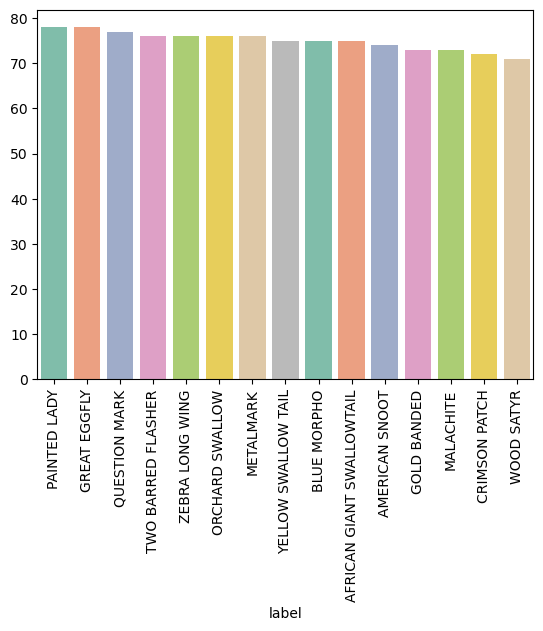

In [19]:
import seaborn as sns

data_dist = butterfly_train_df['label'].value_counts()
sns.barplot(x=data_dist.index[60:], y=data_dist.values[60:], alpha=0.9, palette='Set2')

plt.xticks(rotation='vertical')

Plot the data sample

In [20]:
butterfly_dir

'/NasData/home/knh/project/data/butterfly'

In [21]:
butterfly_train_dir

'/NasData/home/knh/project/data/butterfly/train'

In [22]:
butterfly_test_dir

'/NasData/home/knh/project/data/butterfly/test'

In [23]:
image_path1 = os.path.join(butterfly_train_dir, butterfly_train_df['filename'][0])
print(image_path1)

/NasData/home/knh/project/data/butterfly/train/Image_1.jpg


In [24]:
image1 = cv2.imread(image_path1)
print('Image Size: ', image1)

Image Size:  [[[ 31  43  25]
  [ 31  43  25]
  [ 29  42  26]
  ...
  [ 23  47  35]
  [ 27  53  40]
  [ 33  59  46]]

 [[ 32  44  26]
  [ 29  43  25]
  [ 29  42  26]
  ...
  [ 33  59  46]
  [ 38  63  53]
  [ 41  69  56]]

 [[ 30  45  24]
  [ 28  45  24]
  [ 27  43  25]
  ...
  [ 42  69  59]
  [ 43  72  63]
  [ 48  78  67]]

 ...

 [[ 61  97  61]
  [ 65 103  67]
  [ 63 107  68]
  ...
  [ 24  63  41]
  [ 22  66  43]
  [ 21  67  44]]

 [[ 63  98  64]
  [ 69 107  71]
  [ 66 110  71]
  ...
  [ 20  64  41]
  [ 20  66  43]
  [ 20  68  42]]

 [[ 69 104  70]
  [ 71 109  73]
  [ 68 111  74]
  ...
  [ 19  65  42]
  [ 21  68  42]
  [ 21  69  43]]]


Text(0.5, 1.0, 'train Image 1')

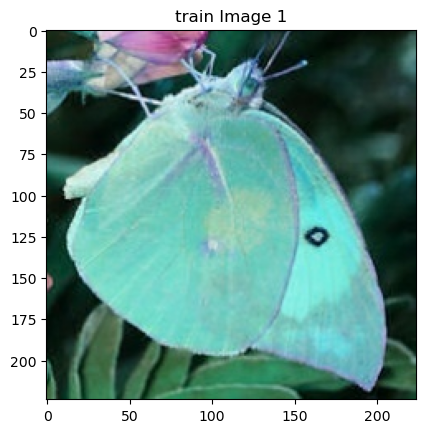

In [25]:
plt.imshow(image1)
plt.title('train Image 1')

In [26]:
image_path2 = os.path.join(butterfly_test_dir, butterfly_test_df['filename'][0])
print(image_path2)

/NasData/home/knh/project/data/butterfly/test/Image_1.jpg


In [27]:
image2 = cv2.imread(image_path2)
print('Image Size: ', image2)

Image Size:  [[[  8  18  25]
  [ 17  27  34]
  [  8  18  25]
  ...
  [ 17  26  59]
  [ 17  25  55]
  [ 16  24  54]]

 [[  4  14  21]
  [  7  17  24]
  [ 20  30  37]
  ...
  [ 14  23  56]
  [ 14  22  52]
  [ 12  20  50]]

 [[  3  11  18]
  [  9  17  24]
  [ 18  27  31]
  ...
  [ 22  32  62]
  [ 16  26  56]
  [  5  15  45]]

 ...

 [[ 78 177 169]
  [ 46 140 135]
  [131 214 216]
  ...
  [ 66 201 247]
  [ 53 190 236]
  [ 56 195 238]]

 [[ 36 139 118]
  [ 68 170 153]
  [  0  99  91]
  ...
  [ 60 168 215]
  [ 81 198 243]
  [ 67 188 232]]

 [[ 46 151 124]
  [ 61 167 144]
  [ 11 117 104]
  ...
  [  0  31  77]
  [ 46 150 197]
  [ 77 188 234]]]


Text(0.5, 1.0, 'train Image 2')

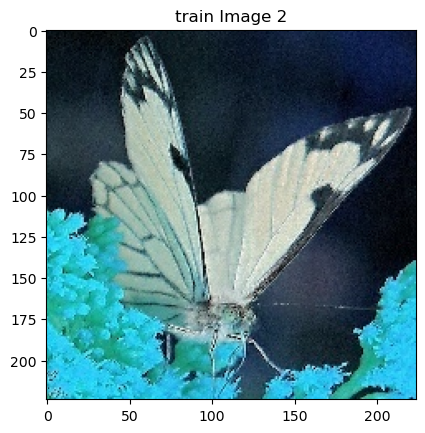

In [28]:
plt.imshow(image2)
plt.title('train Image 2')

Plot the data sample with Transformed Image

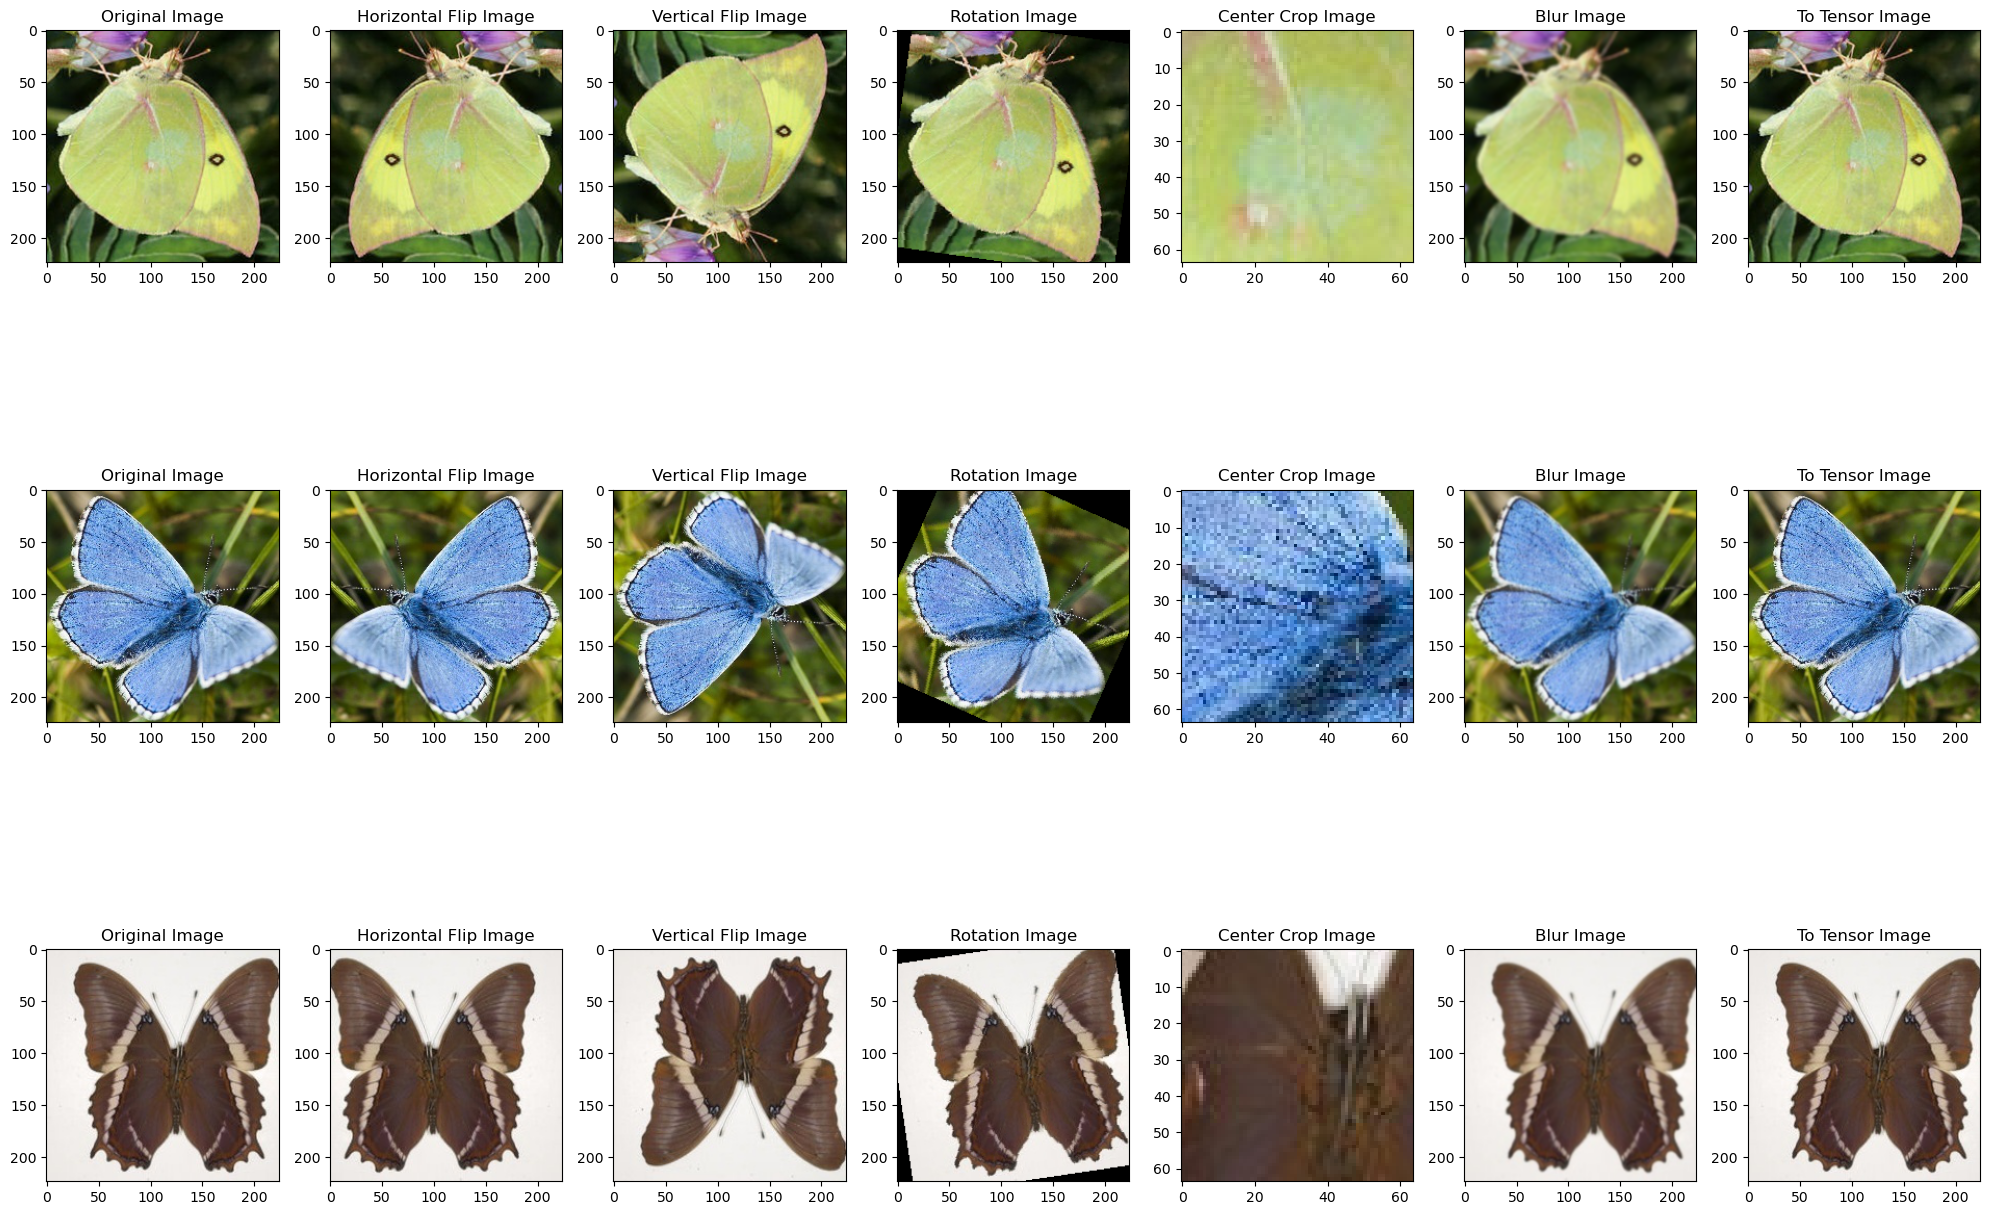

In [29]:
from torchvision import transforms
from PIL import Image
import torch

transformations = {
    "Original": None,
    "Horizontal Flip": transforms.RandomHorizontalFlip(p=1),  # p=1 (probability = 1) to always apply the flip
    "Vertical Flip": transforms.RandomVerticalFlip(p=1),
    "Rotation": transforms.RandomRotation(30),
    "Center Crop": transforms.CenterCrop(64),
    "Blur": transforms.GaussianBlur(5),  # you can blur kernel size = {3, 5, 7} and check the image
    "To Tensor": transforms.ToTensor(),
}

sample_images = [butterfly_train_df['filename'][i] for i in range(3)] # Select 3 sample images

fig, axs = plt.subplots(len(sample_images), len(transformations), figsize=(20, 15))

for i, filepath in enumerate(sample_images):
    image_path = os.path.join(butterfly_train_dir, filepath)
    image = Image.open(image_path).convert('RGB')

    for j, (transformation_name, transformation) in enumerate(transformations.items()):
        if transformation:
            transformed_image = transformation(image)
            if transformation_name == 'To Tensor':
                image = transformed_image
        else:
            transformed_image = image

        if isinstance(transformed_image, torch.Tensor):
            # Convert tensor to numpy array for visualization
            transformed_image = transformed_image.permute(1, 2, 0).numpy()

        axs[i, j].imshow(transformed_image)
        axs[i, j].set_title(f"{transformation_name} Image")

plt.tight_layout()
plt.show()

# 변형하고 안하고 성능 차이 보기

Split the data
>  - train, test 만 있고, val이 없음
>  - train set에서 val을 test_size = 0.2로 나누어줌
>  - train 5199, val 1300, test 2600 으로 맞춰 줌

>  - 이 비율을 상이하게 해서, 결과를 뽑아볼까?
>  - 비율과 관련된 논문 찾아보기

In [30]:
from sklearn.model_selection import train_test_split

train_data_df, val_data_df = train_test_split(butterfly_train_df, test_size=0.2, random_state=123)

In [31]:
train_data_df

,filename,label
198,Image_199.jpg,EASTERN PINE ELFIN
4637,Image_4638.jpg,PIPEVINE SWALLOW
3019,Image_3020.jpg,MALACHITE
2468,Image_2469.jpg,ORANGE TIP
6225,Image_6226.jpg,QUESTION MARK
...,...,...
5218,Image_5219.jpg,SOUTHERN DOGFACE
4060,Image_4061.jpg,PURPLISH COPPER
1346,Image_1347.jpg,CLODIUS PARNASSIAN
3454,Image_3455.jpg,PIPEVINE SWALLOW


In [32]:
val_data_df

,filename,label
2482,Image_2483.jpg,MOURNING CLOAK
5148,Image_5149.jpg,EASTERN DAPPLE WHITE
941,Image_942.jpg,GREEN CELLED CATTLEHEART
970,Image_971.jpg,DANAID EGGFLY
4899,Image_4900.jpg,EASTERN PINE ELFIN
...,...,...
3361,Image_3362.jpg,RED POSTMAN
3346,Image_3347.jpg,CLOUDED SULPHUR
301,Image_302.jpg,EASTERN COMA
3031,Image_3032.jpg,COMMON WOOD-NYMPH


In [33]:
test_data_df = butterfly_test_df

test_data_df

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
...,...
2781,Image_2782.jpg
2782,Image_2783.jpg
2783,Image_2784.jpg
2784,Image_2785.jpg


Image to Tensor

In [34]:
train_data = []
train_labels = []

for index, row in train_data_df.iterrows():
    image_path = os.path.join(butterfly_train_dir, row['filename'])
    image = cv2.imread(image_path)
    train_data.append(image)
    train_labels.append(row['label'])

In [35]:
print('Train Data: ', len(train_data))

print('Train Labels: ', len(train_labels))

print('Train Data Shape: ', train_data[0].shape)

Train Data:  5199
Train Labels:  5199
Train Data Shape:  (224, 224, 3)


In [36]:
val_data = []
val_labels = []

for index, row in val_data_df.iterrows():
    image_path = os.path.join(butterfly_train_dir, row['filename'])
    image = cv2.imread(image_path)
    val_data.append(image)
    val_labels.append(row['label'])

In [37]:
print('Validation Data: ', len(val_data))

print('Validation Labels: ', len(val_labels))

print('Validation Data Shape: ', val_data[0].shape)

Validation Data:  1300
Validation Labels:  1300
Validation Data Shape:  (224, 224, 3)


In [38]:
test_data = []

for index, row in test_data_df.iterrows():
    image_path = os.path.join(butterfly_test_dir, row['filename'])
    image = cv2.imread(image_path)
    test_data.append(image)

In [39]:
print('Test Data: ', len(test_data_df))

print('Test Data Shape: ', test_data[0].shape)

Test Data:  2786
Test Data Shape:  (224, 224, 3)
